https://data.world/lpetrocelli/czech-financial-dataset-real-anonymized-transactions

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler , StandardScaler


from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [2]:
account_df = pd.read_csv('czech-financial-dataset/data/account.csv')
print("number of rows", len(account_df))
account_df.head(20)

number of rows 4500


,account_id,district_id,frequency,date
0,576,55,POPLATEK MESICNE,930101
1,3818,74,POPLATEK MESICNE,930101
2,704,55,POPLATEK MESICNE,930101
3,2378,16,POPLATEK MESICNE,930101
4,2632,24,POPLATEK MESICNE,930102
5,1972,77,POPLATEK MESICNE,930102
6,1539,1,POPLATEK PO OBRATU,930103
7,793,47,POPLATEK MESICNE,930103
8,2484,74,POPLATEK MESICNE,930103
9,1695,76,POPLATEK MESICNE,930103


In [3]:
account_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   account_id   4500 non-null   int64 
 1   district_id  4500 non-null   int64 
 2   frequency    4500 non-null   object
 3   date         4500 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 140.8+ KB


In [4]:
#rename columns
account_df = account_df.rename(columns={'frequency': 'AcctFeeType', 'date':'AcctCreateDate'})

#Change the czech terms into english
mapping = {'POPLATEK MESICNE':'fee per month', 'POPLATEK PO OBRATU':'fee per transaction', 'POPLATEK TYDNE':'fee per week'}
account_df['AcctFeeType'] = account_df['AcctFeeType'].replace(mapping)

#Changing the date column into DateTime Object
#account_df['AcctCreateDate'] = pd.to_datetime(account_df['AcctCreateDate'], format='%y%m%d')

In [5]:
account_df.head()

,account_id,district_id,AcctFeeType,AcctCreateDate
0,576,55,fee per month,930101
1,3818,74,fee per month,930101
2,704,55,fee per month,930101
3,2378,16,fee per month,930101
4,2632,24,fee per month,930102


In [6]:
earliest_index = account_df['AcctCreateDate'].idxmin()
earliest_account = account_df.loc[earliest_index]
earliest_account

account_id                  576
district_id                  55
AcctFeeType       fee per month
AcctCreateDate           930101
Name: 0, dtype: object

In [7]:
latest_index = account_df['AcctCreateDate'].idxmax()
latest_account = account_df.loc[latest_index]
latest_account

account_id                 1573
district_id                  63
AcctFeeType       fee per month
AcctCreateDate           971229
Name: 4498, dtype: object

In [8]:
trans_df = pd.read_csv('czech-financial-dataset/data/trans.csv')
print("number of rows", len(trans_df))
trans_df.head(20)

number of rows 1056320


C:\Users\hazir\AppData\Local\Temp\ipykernel_16928\733682222.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  trans_df = pd.read_csv('czech-financial-dataset/data/trans.csv')


,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN
2,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN
3,1117247,3818,930101,PRIJEM,VKLAD,600.0,600.0,NaN,NaN,NaN
4,579373,1972,930102,PRIJEM,VKLAD,400.0,400.0,NaN,NaN,NaN
5,771035,2632,930102,PRIJEM,VKLAD,1100.0,1100.0,NaN,NaN,NaN
6,452728,1539,930103,PRIJEM,VKLAD,600.0,600.0,NaN,NaN,NaN
7,725751,2484,930103,PRIJEM,VKLAD,1100.0,1100.0,NaN,NaN,NaN
8,497211,1695,930103,PRIJEM,VKLAD,200.0,200.0,NaN,NaN,NaN
9,232960,793,930103,PRIJEM,VKLAD,800.0,800.0,NaN,NaN,NaN


In [9]:
trans_df.dropna(subset=['operation'], inplace=True)

In [10]:
trans_df['operation'].unique()

array(['VKLAD', 'PREVOD Z UCTU', 'VYBER', 'PREVOD NA UCET',
       'VYBER KARTOU'], dtype=object)

In [11]:
#drop columns
drop_cols = [
    'k_symbol',
    'bank',
    'account'
]
trans_df = trans_df.drop(drop_cols, axis=1)

#remove missing values
trans_df.dropna(subset=['operation'], inplace=True)

#rename columns
trans_df = trans_df.rename(columns={'type': 'TransType', 'operation': 'TransOp','date':'TransDate'})

#Change the czech terms into english
mapping = {'PRIJEM':'INCOME', 'VYDAJ':'EXPENSE', 'VYBER':'WITHDRAWAL'}
mapping2 = {'VKLAD': 'depositing money', 'PREVOD Z UCTU':'transfer from account', 'VYBER':'withdrawing money', 
            'PREVOD NA UCET':'transfer to account','VYBER KARTOU':'withdrawing by card'}
trans_df['TransType'] = trans_df['TransType'].replace(mapping)
trans_df['TransOp'] = trans_df['TransOp'].replace(mapping2)

#Changing the date column into DateTime Object
trans_df['TransDate'] = pd.to_datetime(trans_df['TransDate'], format='%y%m%d')

In [12]:
earliest_index = trans_df['TransDate'].idxmax()
earliest_trans = trans_df.loc[earliest_index]
earliest_trans

trans_id                  3592776
account_id                   1888
TransDate     1998-12-31 00:00:00
TransType                 EXPENSE
TransOp         withdrawing money
amount                       36.2
balance                   -3350.9
Name: 1051929, dtype: object

In [13]:
latest_index = trans_df['TransDate'].idxmin()
latest_trans = trans_df.loc[latest_index]
latest_trans

trans_id                   695247
account_id                   2378
TransDate     1993-01-01 00:00:00
TransType                  INCOME
TransOp          depositing money
amount                      700.0
balance                     700.0
Name: 0, dtype: object

In [113]:
len(trans_df['account_id'].unique())

4500

In [114]:
#Adding count of transaction made by customer
trans_counts = trans_df.groupby('account_id')['trans_id'].count().reset_index()
trans_counts.rename(columns={'trans_id': 'TransCount'}, inplace=True)
account_df = pd.merge(account_df, trans_counts, on='account_id', how='left')
account_df


,account_id,AcctFeeType,AcctCreateDate,TransCount_x,TransAmountMean,TransAmountStd,KurtoNor,SkewNor,SpendingKurtoNor,SpendingSkewNor,IncomeKurtoNor,IncomeSkewNor,BalanceRate,BalanceMean,BalanceStd,BalanceMin,BalanceMax,KMeansLabels,AggLabels,TransCount_y
0,576,2,930101,0.562393,0.598106,0.696742,-1.493689,2.787054,-0.012488,5.586610,0.179681,29.994131,0.116083,0.765825,0.518579,0.637499,0.578641,4,2,286
1,3818,2,930101,0.222222,0.210061,0.354267,11.953793,15.906912,0.020981,6.170467,-0.057755,4.675334,0.235268,0.608524,0.302232,0.643596,0.357591,0,3,488
2,704,2,930101,0.429060,0.391671,0.416981,0.646652,9.388337,-0.088899,1.952292,-0.026367,6.258528,0.133192,0.612616,0.314932,0.639024,0.343242,0,3,407
3,2378,2,930101,0.258120,0.138524,0.157296,2.270807,9.121959,0.041990,8.979062,0.004184,5.783141,0.166878,0.385485,0.297326,0.632927,0.250758,6,6,363
4,2632,2,930102,0.220513,0.457889,0.525440,4.142297,12.680537,-0.077144,1.686195,-0.029990,6.053629,0.108855,0.395549,0.571477,0.537155,0.427524,0,3,492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,124,2,971228,0.800000,0.018172,0.028961,16.824583,8.456463,-0.222993,1.429369,0.062201,4.888760,0.107530,0.460000,0.283090,0.639024,0.241115,2,4,58
4496,3958,2,971228,0.169231,0.118842,0.155021,-1.686313,-0.705610,-0.275209,-1.217711,0.012370,-2.641710,0.160695,0.316014,0.107323,0.631403,0.139732,5,0,35
4497,777,2,971228,0.524786,0.034322,0.025280,-0.325875,2.356791,-0.664518,0.227347,-0.686491,0.059999,0.117921,0.366276,0.165040,0.642072,0.171515,1,1,67
4498,1573,2,971229,0.471795,0.258810,0.296423,-0.455800,0.750131,-0.056173,2.433645,0.082568,-5.849976,0.102728,0.470939,0.306830,0.642072,0.303482,2,4,38


AMOUNT COLUMN 

Average transaction amount: This calculation can give an idea about the typical amount a customer spends per transaction.

Standard deviation of transaction amounts: This calculation can give an idea about the variability in transaction amounts for a customer. Customers with a high standard deviation may have more unpredictable spending patterns.

Skewness and kurtosis of transaction amounts: These calculations can give an idea about the shape and distribution of transaction amounts for a customer. Customers with high skewness may have a long tail of high-value transactions, while customers with high kurtosis may have a larger proportion of transactions clustered around the mean.

Total spending: This calculation can give an idea about the overall spending of a customer over a period of time.

Spending by category: If transactions are categorized by type (e.g. grocery, entertainment, travel), calculating the total spending for each category can give insights about a customer's spending habits and priorities.

In [15]:
import scipy.stats as stats

agg_df = trans_df.groupby('account_id')['amount'].agg(['mean','std', 'skew']).reset_index().rename(columns={'mean': 'TransAmountMean','std': 'TransAmountStd', 'skew': 'TransAmountSkew'})

agg_df['TransAmountKurto'] = trans_df.groupby('account_id')['amount'].apply(lambda x: stats.kurtosis(x))
# calculate kurtosis and standard error of kurtosis
kurtosis = trans_df.groupby('account_id')['amount'].apply(lambda x: stats.kurtosis(x))
se_kurtosis = np.sqrt(24/trans_df.groupby('account_id')['amount'].count())

# calculate standardized kurtosis
stand_kurtosis = kurtosis / se_kurtosis

# create a new column for standardized kurtosis
agg_df['KurtoNor'] = stand_kurtosis.values


# calculate skewness and standard error of skewness
skewness = trans_df.groupby('account_id')['amount'].apply(lambda x: stats.skew(x))
se_skewness = np.sqrt(6/trans_df.groupby('account_id')['amount'].count())

# calculate standardized skewness
stand_skewness = skewness / se_skewness
agg_df['SkewNor'] = stand_skewness.values


account_df = pd.merge(account_df, agg_df, on='account_id', how='left')
account_df

,account_id,district_id,AcctFeeType,AcctCreateDate,TransCount,TransAmountMean,TransAmountStd,TransAmountSkew,TransAmountKurto,KurtoNor,SkewNor
0,576,55,fee per month,930101,286,3034.399301,2522.318882,0.405812,-1.369035,-1.493689,2.787054
1,3818,74,fee per month,930101,488,5615.053689,6555.187106,1.769252,NaN,11.953793,15.906912
2,704,55,fee per month,930101,407,6544.757248,7812.679384,1.144122,-1.581009,0.646652,9.388337
3,2378,16,fee per month,930101,363,14605.581267,14545.034188,1.177635,-1.420735,2.270807,9.121959
4,2632,24,fee per month,930102,492,4441.815447,5435.662202,1.404617,-0.632797,4.142297,12.680537
...,...,...,...,...,...,...,...,...,...,...,...
4495,124,55,fee per month,971228,58,1528.417241,1741.787773,2.792632,-0.727856,16.824583,8.456463
4496,3958,59,fee per month,971228,35,15873.805714,11733.491166,-0.305398,-0.660262,-1.686313,-0.705610
4497,777,30,fee per month,971228,67,18684.871642,15434.352020,0.721531,-0.002615,-0.325875,2.356791
4498,1573,63,fee per month,971229,38,3195.794737,2346.387448,0.310464,0.698756,-0.455800,0.750131


In [16]:
account_df.describe()

,account_id,district_id,AcctCreateDate,TransCount,TransAmountMean,TransAmountStd,TransAmountSkew,TransAmountKurto,KurtoNor,SkewNor
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,3948.000000,4500.000000,4500.000000
mean,2786.067556,37.310444,951654.608667,194.045778,6993.216187,7026.491275,1.041295,1.500987,4.332546,5.836461
std,2313.811984,25.177217,14842.188377,108.651991,4877.278629,4896.846904,0.859971,5.162994,15.303862,5.306822
min,1.000000,1.000000,930101.000000,9.000000,965.116923,1001.588925,-0.489090,-1.660522,-5.774017,-1.670558
25%,1182.750000,13.000000,931227.000000,108.000000,2788.423684,2460.716860,0.532562,-0.797319,-1.784843,2.383647
50%,2368.000000,38.000000,960102.000000,172.500000,5732.542427,6079.863223,0.908259,-0.115939,-0.048425,4.719361
75%,3552.250000,60.000000,961101.000000,270.000000,10240.264391,10428.424100,1.337009,1.317757,3.857415,7.842129
max,11382.000000,77.000000,971229.000000,594.000000,26344.084492,22888.832111,6.752966,76.286294,299.530988,52.814545


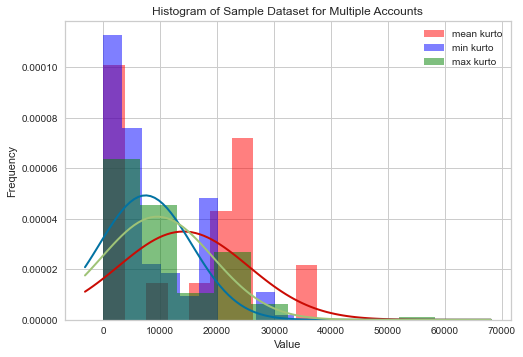

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Collect the data for the three accounts
x1 = trans_df[trans_df['account_id']==1983]['amount'] #mean kurto
x2 = trans_df[trans_df['account_id']==3746]['amount'] #min kurto
x3 = trans_df[trans_df['account_id']==991]['amount'] #max kurto

# Plot the histograms for each account with different colors
plt.hist(x1, bins=10, density=True, alpha=0.5, color='red', label='mean kurto')
plt.hist(x2, bins=10, density=True, alpha=0.5, color='blue', label='min kurto')
plt.hist(x3, bins=10, density=True, alpha=0.5, color='green', label='max kurto')

# Calculate the mean and standard deviation for each account
mu1, std1 = np.mean(x1), np.std(x1)
mu2, std2 = np.mean(x2), np.std(x2)
mu3, std3 = np.mean(x3), np.std(x3)

# Add normal distribution lines to the plot for each account
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p1 = norm.pdf(x, mu1, std1)
p2 = norm.pdf(x, mu2, std2)
p3 = norm.pdf(x, mu3, std3)
plt.plot(x, p1, 'r', linewidth=2)
plt.plot(x, p2, 'b', linewidth=2)
plt.plot(x, p3, 'g', linewidth=2)

# Add labels and a title to the plot
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Dataset for Multiple Accounts')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()


In [18]:
trans_df[trans_df['account_id']==947]['amount'].max()

36960.0

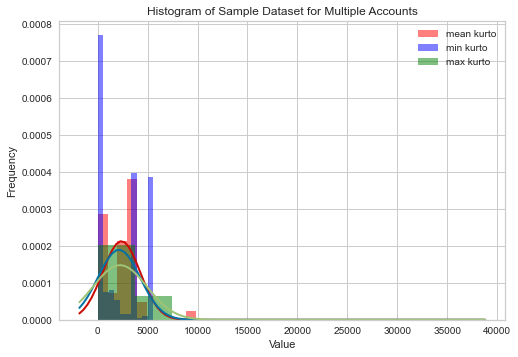

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Collect the data for the three accounts
x1 = trans_df[trans_df['account_id']==703]['amount'] #mean kurto
x2 = trans_df[trans_df['account_id']==1699]['amount'] #min kurto
x3 = trans_df[trans_df['account_id']==947]['amount'] #max kurto

# Plot the histograms for each account with different colors
plt.hist(x1, bins=10, density=True, alpha=0.5, color='red', label='mean kurto')
plt.hist(x2, bins=10, density=True, alpha=0.5, color='blue', label='min kurto')
plt.hist(x3, bins=10, density=True, alpha=0.5, color='green', label='max kurto')

# Calculate the mean and standard deviation for each account
mu1, std1 = np.mean(x1), np.std(x1)
mu2, std2 = np.mean(x2), np.std(x2)
mu3, std3 = np.mean(x3), np.std(x3)

# Add normal distribution lines to the plot for each account
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p1 = norm.pdf(x, mu1, std1)
p2 = norm.pdf(x, mu2, std2)
p3 = norm.pdf(x, mu3, std3)
plt.plot(x, p1, 'r', linewidth=2)
plt.plot(x, p2, 'b', linewidth=2)
plt.plot(x, p3, 'g', linewidth=2)

# Add labels and a title to the plot
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Dataset for Multiple Accounts')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

Skewness and kurtosis are statistical measures that help us to understand the shape of a dataset's distribution.

Skewness measures the degree of asymmetry of a distribution. If a distribution is perfectly symmetrical, the skewness is zero. If the tail of the distribution extends more to the right, the distribution is said to be positively skewed, and the skewness value will be greater than zero. Conversely, if the tail of the distribution extends more to the left, the distribution is said to be negatively skewed, and the skewness value will be less than zero.

Kurtosis measures the degree of peakness or flatness of a distribution. If a distribution is perfectly normal (i.e., bell-shaped), the kurtosis is three. If the distribution is more peaked than normal, it is said to be leptokurtic, and the kurtosis value will be greater than three. If the distribution is less peaked than normal, it is said to be platykurtic, and the kurtosis value will be less than three.

In general, a normal distribution has zero skewness and a kurtosis of three. However, it is possible for non-normal distributions to have skewness and kurtosis values that approximate those of a normal distribution.

Kurtosis graphs

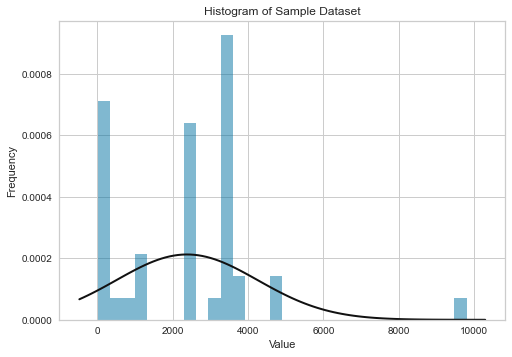

In [20]:
from scipy.stats import norm #mean kurtoNor


x = trans_df[trans_df['account_id']==703]['amount']

#num_cols = x.select_dtypes(include=['float64', 'int64']).columns

# Plot a histogram of the data with 20 bins
plt.hist(x, bins=30, alpha=0.5, density=True)

mu, std = np.mean(x), np.std(x)


# Add a normal distribution line to the plot
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Add labels and a title to the plot
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Dataset')
plt.show()


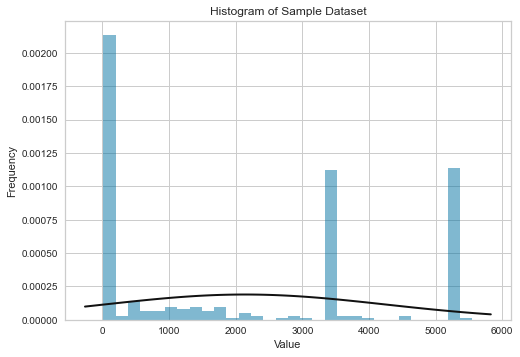

In [21]:
from scipy.stats import norm #min kurtoNor


x = trans_df[trans_df['account_id']==1699]['amount']

#num_cols = x.select_dtypes(include=['float64', 'int64']).columns

# Plot a histogram of the data with 20 bins
plt.hist(x, bins=30, alpha=0.5, density=True)

mu, std = np.mean(x), np.std(x)


# Add a normal distribution line to the plot
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Add labels and a title to the plot
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Dataset')
plt.show()


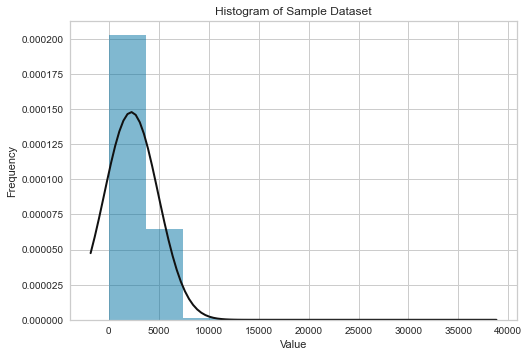

In [22]:
from scipy.stats import norm #max kurtoNor


x = trans_df[trans_df['account_id']==947]['amount']

plt.hist(x, bins=10, density=True, alpha=0.5)

mu, std = np.mean(x), np.std(x)

# Add a normal distribution line to the plot
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)


# Add labels and a title to the plot
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Dataset')
plt.show()


Skew Graphs

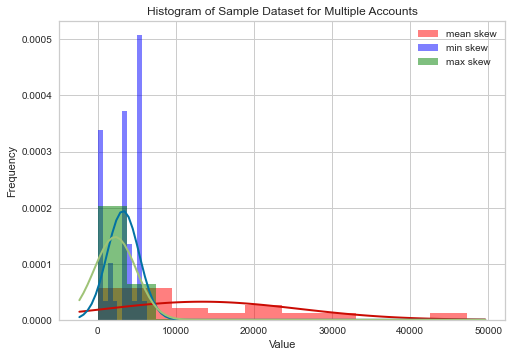

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Collect the data for the three accounts
x1 = trans_df[trans_df['account_id']==4332]['amount'] #mean skew
x2 = trans_df[trans_df['account_id']==2312]['amount'] #min skew
x3 = trans_df[trans_df['account_id']==947]['amount'] #max skew

# Plot the histograms for each account with different colors
plt.hist(x1, bins=10, density=True, alpha=0.5, color='red', label='mean skew')
plt.hist(x2, bins=10, density=True, alpha=0.5, color='blue', label='min skew')
plt.hist(x3, bins=10, density=True, alpha=0.5, color='green', label='max skew')

# Calculate the mean and standard deviation for each account
mu1, std1 = np.mean(x1), np.std(x1)
mu2, std2 = np.mean(x2), np.std(x2)
mu3, std3 = np.mean(x3), np.std(x3)

# Add normal distribution lines to the plot for each account
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p1 = norm.pdf(x, mu1, std1)
p2 = norm.pdf(x, mu2, std2)
p3 = norm.pdf(x, mu3, std3)
plt.plot(x, p1, 'r', linewidth=2)
plt.plot(x, p2, 'b', linewidth=2)
plt.plot(x, p3, 'g', linewidth=2)

# Add labels and a title to the plot
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Dataset for Multiple Accounts')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

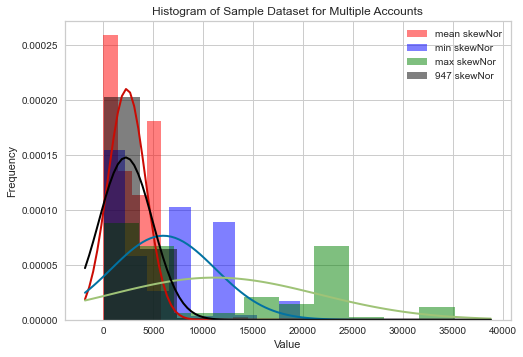

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Collect the data for the three accounts
x1 = trans_df[trans_df['account_id']==9635]['amount'] #mean skew
x2 = trans_df[trans_df['account_id']==1116]['amount'] #min skew
x3 = trans_df[trans_df['account_id']==424]['amount'] #max skew
x4 = trans_df[trans_df['account_id']==947]['amount'] #max skew

# Plot the histograms for each account with different colors
plt.hist(x1, bins=10, density=True, alpha=0.5, color='red', label='mean skewNor')
plt.hist(x2, bins=10, density=True, alpha=0.5, color='blue', label='min skewNor')
plt.hist(x3, bins=10, density=True, alpha=0.5, color='green', label='max skewNor')
plt.hist(x4, bins=10, density=True, alpha=0.5, color='black', label='947 skewNor')

# Calculate the mean and standard deviation for each account
mu1, std1 = np.mean(x1), np.std(x1)
mu2, std2 = np.mean(x2), np.std(x2)
mu3, std3 = np.mean(x3), np.std(x3)
mu4, std4 = np.mean(x4), np.std(x4)

# Add normal distribution lines to the plot for each account
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p1 = norm.pdf(x, mu1, std1)
p2 = norm.pdf(x, mu2, std2)
p3 = norm.pdf(x, mu3, std3)
p4 = norm.pdf(x, mu4, std4)
plt.plot(x, p1, 'r', linewidth=2)
plt.plot(x, p2, 'b', linewidth=2)
plt.plot(x, p3, 'g', linewidth=2)
plt.plot(x, p4, 'black', linewidth=2)

# Add labels and a title to the plot
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Dataset for Multiple Accounts')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

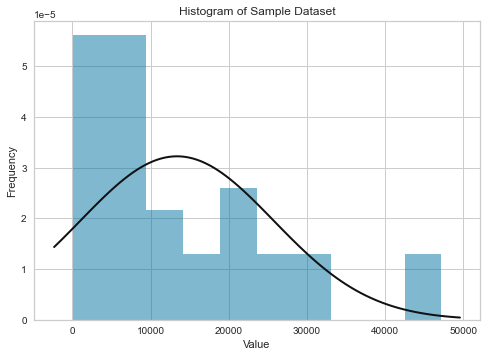

In [25]:
#mean skew
from scipy.stats import norm


x = trans_df[trans_df['account_id']==4332]['amount']

plt.hist(x, bins=10, density=True, alpha=0.5)

mu, std = np.mean(x), np.std(x)

# Add a normal distribution line to the plot
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)


# Add labels and a title to the plot
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Dataset')
plt.show()


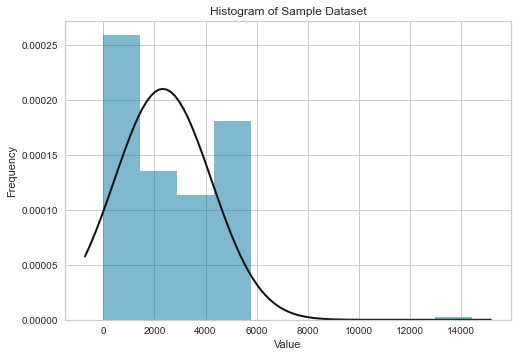

In [26]:
#mean skewNor
from scipy.stats import norm

x = trans_df[trans_df['account_id']==9635]['amount']

plt.hist(x, bins=10, density=True, alpha=0.5)

mu, std = np.mean(x), np.std(x)

# Add a normal distribution line to the plot
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)


# Add labels and a title to the plot
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Dataset')
plt.show()

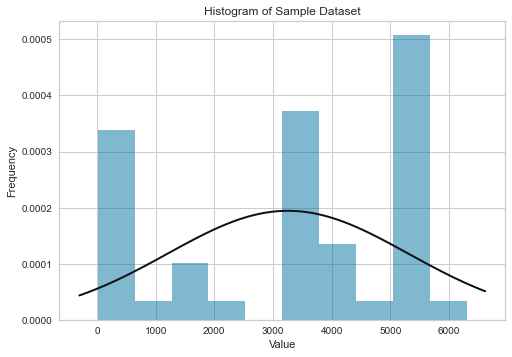

In [27]:
#min skew
from scipy.stats import norm


x = trans_df[trans_df['account_id']==2312]['amount']

plt.hist(x, bins=10, density=True, alpha=0.5)

mu, std = np.mean(x), np.std(x)

# Add a normal distribution line to the plot
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)


# Add labels and a title to the plot
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Dataset')
plt.show()


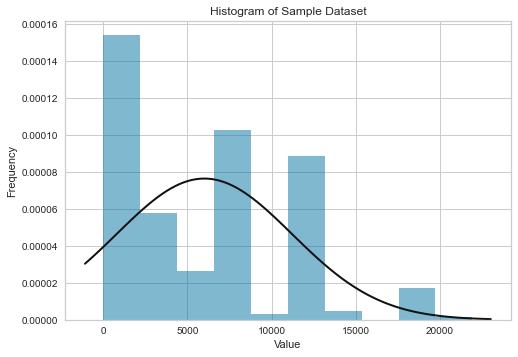

In [28]:
#min skewNor
from scipy.stats import norm

#min skewNor
x = trans_df[trans_df['account_id']==1116]['amount']

plt.hist(x, bins=10, density=True, alpha=0.5)

mu, std = np.mean(x), np.std(x)

# Add a normal distribution line to the plot
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)


# Add labels and a title to the plot
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Dataset')
plt.show()
	

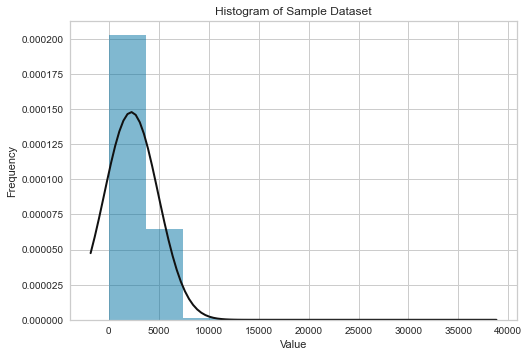

In [29]:

#max skew
from scipy.stats import norm

x = trans_df[trans_df['account_id']==947]['amount']

plt.hist(x, bins=10, density=True, alpha=0.5)

mu, std = np.mean(x), np.std(x)

# Add a normal distribution line to the plot
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)


# Add labels and a title to the plot
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Dataset')
plt.show()


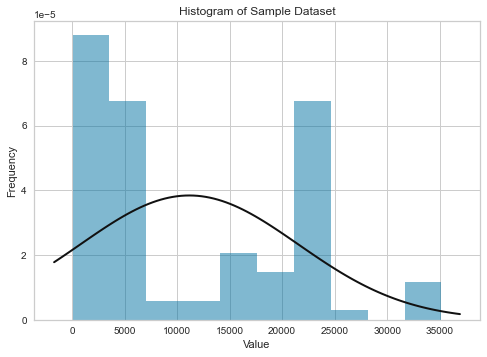

In [30]:
#max skewNor
from scipy.stats import norm


x = trans_df[trans_df['account_id']==424]['amount']

plt.hist(x, bins=10, density=True, alpha=0.5)

mu, std = np.mean(x), np.std(x)

# Add a normal distribution line to the plot
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)


# Add labels and a title to the plot
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Dataset')
plt.show()


In [31]:
'''
spending_df = trans_df.loc[trans_df['TransType'].isin(['WITHDRAWAL', 'EXPENSE'])] #sum up the expense of accounts
spending_df = spending_df.groupby('account_id')['amount'].sum().reset_index()
account_df = account_df.merge(spending_df, on='account_id', how='left').fillna(0)
account_df.rename(columns={'amount': 'Spending'}, inplace=True)
account_df
'''

"\nspending_df = trans_df.loc[trans_df['TransType'].isin(['WITHDRAWAL', 'EXPENSE'])] #sum up the expense of accounts\nspending_df = spending_df.groupby('account_id')['amount'].sum().reset_index()\naccount_df = account_df.merge(spending_df, on='account_id', how='left').fillna(0)\naccount_df.rename(columns={'amount': 'Spending'}, inplace=True)\naccount_df\n"

In [32]:
# create a dictionary to store the average income amount for each account and month
ave_spending = {}

# iterate over unique account IDs
for account_id in trans_df['account_id'].unique():
    # filter transactions for the current account
    account_trans_df = trans_df[trans_df['account_id'] == account_id]
    
    # iterate over unique months in the TransDate column for the current account
    for month in account_trans_df['TransDate'].dt.to_period('M').unique():
        # filter transactions for the current month
        month_trans_df = account_trans_df[(account_trans_df['TransType'] == 'WITHDRAWAL') | (account_trans_df['TransType'] == 'EXPENSE') & (account_trans_df['TransDate'].dt.to_period('M') == month)]
        
        # calculate the average income for the current account and month
        if not month_trans_df.empty:
            ave_spending[(account_id, str(month))] = month_trans_df['amount'].sum()
        else:
            ave_spending[(account_id, str(month))] = 0


In [33]:
spending_df = pd.DataFrame.from_dict(ave_spending, orient='index', columns=['MonSpending'])
spending_df.reset_index(inplace=True)
spending_df.rename(columns={'index':'account_month'}, inplace=True)
spending_df[['account_id', 'Month']] = pd.DataFrame(spending_df['account_month'].tolist(), index=spending_df.index)
spending_df.drop('account_month', axis=1, inplace=True)

In [34]:
results_df = pd.DataFrame()

for account_id in spending_df['account_id'].unique():
    account_spending_df = spending_df[spending_df['account_id'] == account_id]
    results_df.loc[account_id, 'account_id'] = account_id
    
    # Calculate Fisher-Pearson standardized moment coefficient approach for kurtosis to reduce precision loss issue
    n = account_spending_df['MonSpending'].count()
    kurtosis = stats.kurtosis(account_spending_df['MonSpending'])
    var = np.var(account_spending_df['MonSpending'], ddof=1)
    skew = stats.skew(account_spending_df['MonSpending'])
    gamma_1 = skew * np.sqrt(n*(n-1)) / (n-2)
    gamma_2 = (kurtosis-3) * (n-1) / ((n-2)*(n-3))
    beta_2 = 3*(n-1)**2 / ((n-2)*(n-3))
    se_kurtosis = np.sqrt((beta_2-1) / (n-1) + gamma_2**2 + (8*gamma_1**2*beta_2*(n-1)) / ((n-2)*(n-3)))
    stand_kurtosis = gamma_2 / se_kurtosis
    # create a new column for standardized kurtosis
    results_df.loc[account_id, 'SpendingKurtoNor'] = stand_kurtosis

    # Calculate Fisher-Pearson standardized moment coefficient approach for skewness
    se_skewness = np.sqrt(6*(n-2) / ((n+1)*(n+3)))
    stand_skewness = skew / se_skewness
    results_df.loc[account_id, 'SpendingSkewNor'] = stand_skewness

results_df = results_df.reset_index(drop=True)


In [35]:
results_df.head()

,account_id,SpendingKurtoNor,SpendingSkewNor
0,2378.0,0.041990,8.979062
1,576.0,-0.012488,5.586610
2,704.0,-0.088899,1.952292
3,3818.0,0.020981,6.170467
4,1972.0,-0.015889,4.883549


In [36]:
results_df['account_id'] = results_df['account_id'].astype('int64')
account_df = pd.merge(account_df, results_df[['account_id', 'SpendingKurtoNor', 'SpendingSkewNor']], on='account_id', how='left')
account_df

,account_id,district_id,AcctFeeType,AcctCreateDate,TransCount,TransAmountMean,TransAmountStd,TransAmountSkew,TransAmountKurto,KurtoNor,SkewNor,SpendingKurtoNor,SpendingSkewNor
0,576,55,fee per month,930101,286,3034.399301,2522.318882,0.405812,-1.369035,-1.493689,2.787054,-0.012488,5.586610
1,3818,74,fee per month,930101,488,5615.053689,6555.187106,1.769252,NaN,11.953793,15.906912,0.020981,6.170467
2,704,55,fee per month,930101,407,6544.757248,7812.679384,1.144122,-1.581009,0.646652,9.388337,-0.088899,1.952292
3,2378,16,fee per month,930101,363,14605.581267,14545.034188,1.177635,-1.420735,2.270807,9.121959,0.041990,8.979062
4,2632,24,fee per month,930102,492,4441.815447,5435.662202,1.404617,-0.632797,4.142297,12.680537,-0.077144,1.686195
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,124,55,fee per month,971228,58,1528.417241,1741.787773,2.792632,-0.727856,16.824583,8.456463,-0.222993,1.429369
4496,3958,59,fee per month,971228,35,15873.805714,11733.491166,-0.305398,-0.660262,-1.686313,-0.705610,-0.275209,-1.217711
4497,777,30,fee per month,971228,67,18684.871642,15434.352020,0.721531,-0.002615,-0.325875,2.356791,-0.664518,0.227347
4498,1573,63,fee per month,971229,38,3195.794737,2346.387448,0.310464,0.698756,-0.455800,0.750131,-0.056173,2.433645


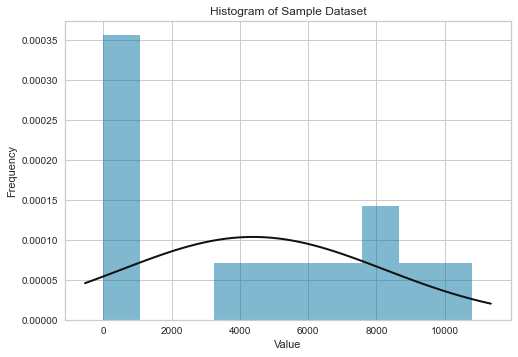

In [37]:

#max skew
from scipy.stats import norm

x = spending_df[spending_df['account_id']==3934]['MonSpending']

plt.hist(x, bins=10, density=True, alpha=0.5)

mu, std = np.mean(x), np.std(x)

# Add a normal distribution line to the plot
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)


# Add labels and a title to the plot
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Dataset')
plt.show()


In [38]:
# create a dictionary to store the average income amount for each account and month
ave_income = {}

# iterate over unique account IDs
for account_id in trans_df['account_id'].unique():
    # filter transactions for the current account
    account_trans_df = trans_df[trans_df['account_id'] == account_id]
    
    # iterate over unique months in the TransDate column for the current account
    for month in account_trans_df['TransDate'].dt.to_period('M').unique():
        # filter transactions for the current month
        month_trans_df = account_trans_df[(account_trans_df['TransType'] == 'INCOME') & (account_trans_df['TransDate'].dt.to_period('M') == month)]
        
        # calculate the average income for the current account and month
        if not month_trans_df.empty:
            ave_income[(account_id, str(month))] = month_trans_df['amount'].sum()
        else:
            ave_income[(account_id, str(month))] = 0


In [39]:
income_df = pd.DataFrame.from_dict(ave_income, orient='index', columns=['MonIncome'])
income_df.reset_index(inplace=True)
income_df.rename(columns={'index':'account_month'}, inplace=True)
income_df[['account_id', 'Month']] = pd.DataFrame(income_df['account_month'].tolist(), index=income_df.index)
income_df.drop('account_month', axis=1, inplace=True)

In [40]:
results_df = pd.DataFrame()

for account_id in income_df['account_id'].unique():
    account_income_df = income_df[income_df['account_id'] == account_id]
    results_df.loc[account_id, 'account_id'] = account_id
    
    # Calculate Fisher-Pearson standardized moment coefficient approach for kurtosis to reduce precision loss issue
    n = account_income_df['MonIncome'].count()
    kurtosis = stats.kurtosis(account_income_df['MonIncome'])
    var = np.var(account_income_df['MonIncome'], ddof=1)
    skew = stats.skew(account_income_df['MonIncome'])
    gamma_1 = skew * np.sqrt(n*(n-1)) / (n-2)
    gamma_2 = (kurtosis-3) * (n-1) / ((n-2)*(n-3))
    beta_2 = 3*(n-1)**2 / ((n-2)*(n-3))
    se_kurtosis = np.sqrt((beta_2-1) / (n-1) + gamma_2**2 + (8*gamma_1**2*beta_2*(n-1)) / ((n-2)*(n-3)))
    stand_kurtosis = gamma_2 / se_kurtosis
    # create a new column for standardized kurtosis
    results_df.loc[account_id, 'IncomeKurtoNor'] = stand_kurtosis

    # Calculate Fisher-Pearson standardized moment coefficient approach for skewness
    se_skewness = np.sqrt(6*(n-2) / ((n+1)*(n+3)))
    stand_skewness = skew / se_skewness
    results_df.loc[account_id, 'IncomeSkewNor'] = stand_skewness

results_df = results_df.reset_index(drop=True)

In [41]:
results_df['account_id'] = results_df['account_id'].astype('int64')
account_df = pd.merge(account_df, results_df[['account_id', 'IncomeKurtoNor', 'IncomeSkewNor']], on='account_id', how='left')
account_df

,account_id,district_id,AcctFeeType,AcctCreateDate,TransCount,TransAmountMean,TransAmountStd,TransAmountSkew,TransAmountKurto,KurtoNor,SkewNor,SpendingKurtoNor,SpendingSkewNor,IncomeKurtoNor,IncomeSkewNor
0,576,55,fee per month,930101,286,3034.399301,2522.318882,0.405812,-1.369035,-1.493689,2.787054,-0.012488,5.586610,0.179681,29.994131
1,3818,74,fee per month,930101,488,5615.053689,6555.187106,1.769252,NaN,11.953793,15.906912,0.020981,6.170467,-0.057755,4.675334
2,704,55,fee per month,930101,407,6544.757248,7812.679384,1.144122,-1.581009,0.646652,9.388337,-0.088899,1.952292,-0.026367,6.258528
3,2378,16,fee per month,930101,363,14605.581267,14545.034188,1.177635,-1.420735,2.270807,9.121959,0.041990,8.979062,0.004184,5.783141
4,2632,24,fee per month,930102,492,4441.815447,5435.662202,1.404617,-0.632797,4.142297,12.680537,-0.077144,1.686195,-0.029990,6.053629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,124,55,fee per month,971228,58,1528.417241,1741.787773,2.792632,-0.727856,16.824583,8.456463,-0.222993,1.429369,0.062201,4.888760
4496,3958,59,fee per month,971228,35,15873.805714,11733.491166,-0.305398,-0.660262,-1.686313,-0.705610,-0.275209,-1.217711,0.012370,-2.641710
4497,777,30,fee per month,971228,67,18684.871642,15434.352020,0.721531,-0.002615,-0.325875,2.356791,-0.664518,0.227347,-0.686491,0.059999
4498,1573,63,fee per month,971229,38,3195.794737,2346.387448,0.310464,0.698756,-0.455800,0.750131,-0.056173,2.433645,0.082568,-5.849976


In [77]:
v = income_df[income_df['account_id'] == 1]
v.describe()

,FreqIncome,account_id
count,46.000000,46.0
mean,4157.717391,1.0
std,1974.308348,0.0
min,1000.000000,1.0
25%,3679.000000,1.0
50%,3679.000000,1.0
75%,3679.000000,1.0
max,16279.000000,1.0


In [79]:
c = income_df[income_df['account_id'] == 2378]
c.describe(
    
)

,FreqIncome,account_id
count,72.000000,72.0
mean,37368.277778,2378.0
std,38187.545407,0.0
min,0.000000,2378.0
25%,5925.000000,2378.0
50%,26828.500000,2378.0
75%,53871.250000,2378.0
max,183588.000000,2378.0


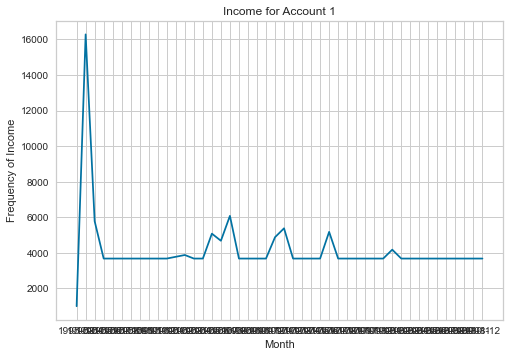

In [43]:
import matplotlib.pyplot as plt

# filter income data for the specified account
account_id = 1
account_income = income_df[income_df['account_id'] == account_id]

# create line plot
plt.plot(account_income['Month'], account_income['FreqIncome'])

# set plot title and axis labels
plt.title(f"Income for Account {account_id}")
plt.xlabel("Month")
plt.ylabel("Frequency of Income")

# display plot
plt.show()


In [33]:
account_df

,account_id,district_id,AcctFeeType,AcctCreateDate,TransCount,TransAmountMean,TransAmountStd,TransAmountSkew,TransAmountKurto,Spending
0,576,55,fee per month,930101,286,3034.399301,2522.318882,0.405812,-1.369035,420034.2
1,3818,74,fee per month,930101,488,5615.053689,6555.187106,1.769252,0.000000,1345498.2
2,704,55,fee per month,930101,407,6544.757248,7812.679384,1.144122,-1.581009,1296604.2
3,2378,16,fee per month,930101,363,14605.581267,14545.034188,1.177635,-1.420735,2611310.0
4,2632,24,fee per month,930102,492,4441.815447,5435.662202,1.404617,-0.632797,1066581.2
...,...,...,...,...,...,...,...,...,...,...
4495,124,55,fee per month,971228,58,1528.417241,1741.787773,2.792632,-0.727856,37968.2
4496,3958,59,fee per month,971228,35,15873.805714,11733.491166,-0.305398,-0.660262,252462.2
4497,777,30,fee per month,971228,67,18684.871642,15434.352020,0.721531,-0.002615,592367.4
4498,1573,63,fee per month,971229,38,3195.794737,2346.387448,0.310464,0.698756,54536.2


In [29]:
account_df.describe()

,account_id,district_id,AcctCreateDate,TransCount,TransAmountMean,TransAmountStd,TransAmountSkew,TransAmountKurto,KurtoNor
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,3948.000000,4500.000000
mean,2786.067556,37.310444,951654.608667,194.045778,6993.216187,7026.491275,1.041295,1.500987,4.332546
std,2313.811984,25.177217,14842.188377,108.651991,4877.278629,4896.846904,0.859971,5.162994,15.303862
min,1.000000,1.000000,930101.000000,9.000000,965.116923,1001.588925,-0.489090,-1.660522,-5.774017
25%,1182.750000,13.000000,931227.000000,108.000000,2788.423684,2460.716860,0.532562,-0.797319,-1.784843
50%,2368.000000,38.000000,960102.000000,172.500000,5732.542427,6079.863223,0.908259,-0.115939,-0.048425
75%,3552.250000,60.000000,961101.000000,270.000000,10240.264391,10428.424100,1.337009,1.317757,3.857415
max,11382.000000,77.000000,971229.000000,594.000000,26344.084492,22888.832111,6.752966,76.286294,299.530988


BALANCE COLUMN

If you have the balance of the account after every transaction, there are several statistical calculations that you can use to gain insights about the customer. Here are some examples:

Mean balance: Calculate the mean balance for each customer. This will give you an idea of their typical account balance and whether it is increasing or decreasing over time.

Standard deviation of balance: Calculate the standard deviation of the balance for each customer. This will tell you how much the balance typically varies over time.

Maximum and minimum balance: Look at the maximum and minimum balance for each customer. This will give you an idea of their account balance range and whether they have had any significant fluctuations.

Balance trend: Plot the balance over time for each customer. Look for any trends, such as increasing or decreasing balances, and see if there are any significant events or transactions that may have affected the balance.

Balance change: Calculate the change in balance from one transaction to the next for each customer. This will give you an idea of their spending or saving habits and whether they tend to make large or small transactions.

Balance percentile: Calculate the percentile rank of each customer's balance compared to all other customers. This will help you identify high or low balance customers and may be useful for targeting marketing campaigns or promotions.

By analyzing these statistical calculations, you can gain insights about your customers' account balances and use this information to make data-driven decisions about your business.

No handles with labels found to put in legend.


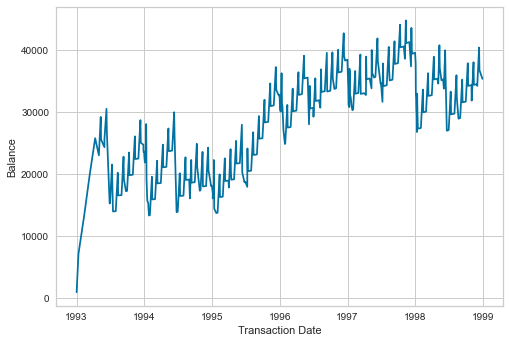

In [42]:
cust_bal = trans_df[trans_df['account_id']== 576]


plt.plot(cust_bal['TransDate'], cust_bal['balance'])

# Add axis labels and legend
plt.xlabel('Transaction Date')
plt.ylabel('Balance')
plt.legend()

# Show the plot
plt.show()

In [43]:
# Calculate account balance rate
trans_df = trans_df.sort_values(['account_id', 'TransDate'])
trans_df['balance_change'] = trans_df.groupby('account_id')['balance'].diff()
balance_rate_df = trans_df.groupby('account_id')['balance_change'].mean().reset_index()
balance_rate_df = balance_rate_df.rename(columns={'balance_change': 'BalanceRate'})
account_df = pd.merge(account_df, balance_rate_df, on='account_id', how='left')
account_df

,account_id,district_id,AcctFeeType,AcctCreateDate,TransCount,TransAmountMean,TransAmountStd,TransAmountSkew,TransAmountKurto,KurtoNor,SkewNor,SpendingKurtoNor,SpendingSkewNor,IncomeKurtoNor,IncomeSkewNor,BalanceRate
0,576,55,fee per month,930101,286,3034.399301,2522.318882,0.405812,-1.369035,-1.493689,2.787054,-0.012488,5.586610,0.179681,29.994131,121.064912
1,3818,74,fee per month,930101,488,5615.053689,6555.187106,1.769252,NaN,11.953793,15.906912,0.020981,6.170467,-0.057755,4.675334,125.986037
2,704,55,fee per month,930101,407,6544.757248,7812.679384,1.144122,-1.581009,0.646652,9.388337,-0.088899,1.952292,-0.026367,6.258528,197.972167
3,2378,16,fee per month,930101,363,14605.581267,14545.034188,1.177635,-1.420735,2.270807,9.121959,0.041990,8.979062,0.004184,5.783141,129.898895
4,2632,24,fee per month,930102,492,4441.815447,5435.662202,1.404617,-0.632797,4.142297,12.680537,-0.077144,1.686195,-0.029990,6.053629,125.481466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,124,55,fee per month,971228,58,1528.417241,1741.787773,2.792632,-0.727856,16.824583,8.456463,-0.222993,1.429369,0.062201,4.888760,222.970175
4496,3958,59,fee per month,971228,35,15873.805714,11733.491166,-0.305398,-0.660262,-1.686313,-0.705610,-0.275209,-1.217711,0.012370,-2.641710,1507.761765
4497,777,30,fee per month,971228,67,18684.871642,15434.352020,0.721531,-0.002615,-0.325875,2.356791,-0.664518,0.227347,-0.686491,0.059999,1059.710606
4498,1573,63,fee per month,971229,38,3195.794737,2346.387448,0.310464,0.698756,-0.455800,0.750131,-0.056173,2.433645,0.082568,-5.849976,321.645946


In [44]:
agg_df = trans_df.groupby('account_id')['balance'].agg(['mean','std', 'min','max']).reset_index().rename(columns={'mean': 'BalanceMean','std': 'BalanceStd', 'min': 'BalanceMin','max': 'BalanceMax'})
account_df = pd.merge(account_df, agg_df, on='account_id', how='left')
account_df

,account_id,district_id,AcctFeeType,AcctCreateDate,TransCount,TransAmountMean,TransAmountStd,TransAmountSkew,TransAmountKurto,KurtoNor,SkewNor,SpendingKurtoNor,SpendingSkewNor,IncomeKurtoNor,IncomeSkewNor,BalanceRate,BalanceMean,BalanceStd,BalanceMin,BalanceMax
0,576,55,fee per month,930101,286,3034.399301,2522.318882,0.405812,-1.369035,-1.493689,2.787054,-0.012488,5.586610,0.179681,29.994131,121.064912,28495.208741,8179.224876,900.0,44853.6
1,3818,74,fee per month,930101,488,5615.053689,6555.187106,1.769252,NaN,11.953793,15.906912,0.020981,6.170467,-0.057755,4.675334,125.986037,47177.765574,11844.159489,600.0,82000.8
2,704,55,fee per month,930101,407,6544.757248,7812.679384,1.144122,-1.581009,0.646652,9.388337,-0.088899,1.952292,-0.026367,6.258528,197.972167,34726.788698,11281.096195,1000.0,82976.7
3,2378,16,fee per month,930101,363,14605.581267,14545.034188,1.177635,-1.420735,2.270807,9.121959,0.041990,8.979062,0.004184,5.783141,129.898895,55223.939945,27192.180897,700.0,151483.0
4,2632,24,fee per month,930102,492,4441.815447,5435.662202,1.404617,-0.632797,4.142297,12.680537,-0.077144,1.686195,-0.029990,6.053629,125.481466,34664.846545,9756.950648,1100.0,65853.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,124,55,fee per month,971228,58,1528.417241,1741.787773,2.792632,-0.727856,16.824583,8.456463,-0.222993,1.429369,0.062201,4.888760,222.970175,17892.250000,4838.279165,800.0,26468.4
4496,3958,59,fee per month,971228,35,15873.805714,11733.491166,-0.305398,-0.660262,-1.686313,-0.705610,-0.275209,-1.217711,0.012370,-2.641710,1507.761765,44227.271429,16687.774286,1000.0,77511.8
4497,777,30,fee per month,971228,67,18684.871642,15434.352020,0.721531,-0.002615,-0.325875,2.356791,-0.664518,0.227347,-0.686491,0.059999,1059.710606,74854.343284,27877.945137,300.0,136506.4
4498,1573,63,fee per month,971229,38,3195.794737,2346.387448,0.310464,0.698756,-0.455800,0.750131,-0.056173,2.433645,0.082568,-5.849976,321.645946,16198.092105,4760.049491,1000.0,26036.5


In [38]:
loan_df = pd.read_csv('czech-financial-dataset/data/loan.csv')
print("number of rows", len(loan_df))
loan_df.head(20)

number of rows 682


,loan_id,account_id,date,amount,duration,payments,status
0,5314,1787,930705,96396,12,8033.0,B
1,5316,1801,930711,165960,36,4610.0,A
2,6863,9188,930728,127080,60,2118.0,A
3,5325,1843,930803,105804,36,2939.0,A
4,7240,11013,930906,274740,60,4579.0,A
5,6687,8261,930913,87840,24,3660.0,A
6,7284,11265,930915,52788,12,4399.0,A
7,6111,5428,930924,174744,24,7281.0,B
8,7235,10973,931013,154416,48,3217.0,A
9,5997,4894,931104,117024,24,4876.0,A


In [39]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   loan_id     682 non-null    int64  
 1   account_id  682 non-null    int64  
 2   date        682 non-null    int64  
 3   amount      682 non-null    int64  
 4   duration    682 non-null    int64  
 5   payments    682 non-null    float64
 6   status      682 non-null    object 
dtypes: float64(1), int64(5), object(1)
memory usage: 37.4+ KB


In [40]:
#drop columns
drop_cols = [
    'loan_id' #every loan_id and account_id is unique we do not need loan id 
]
loan_df = loan_df.drop(drop_cols, axis=1)

#remove missing values
loan_df = loan_df.dropna() #no missing values
print("number of rows", len(loan_df))

#rename columns
loan_df = loan_df.rename(columns={'date': 'LoanStartDate'})

#Changing the date column into DateTime Object
loan_df['LoanStartDate'] = pd.to_datetime(loan_df['LoanStartDate'], format='%y%m%d')

number of rows 682


In [41]:
# Calculate expected loan finish date
loan_df['LoanFinishDate'] = loan_df['LoanStartDate'] + pd.to_timedelta(loan_df['duration'] * 30, unit='D')

In [49]:
income_df[income_df['account_id']== 2378]

,FreqIncome,account_id,Month
0,700.0,2378,1993-01-01
1,30192.0,2378,1993-02-01
2,4800.0,2378,1993-03-01
3,29841.0,2378,1993-04-01
4,42538.0,2378,1993-05-01
...,...,...,...
66,27498.0,2378,1998-07-01
67,44359.0,2378,1998-08-01
68,18422.0,2378,1998-09-01
69,44483.0,2378,1998-10-01


In [58]:
# merge income_df and loan_df on account_id
merged_df = pd.merge(income_df, loan_df, on='account_id')

# filter the resulting dataframe based on the conditions you described
filtered_df = merged_df[(merged_df['status'].isin(['A', 'B'])) & (merged_df['Month'] >= merged_df['LoanStartDate']) & (merged_df['Month'] <= merged_df['LoanFinishDate'])]
filtered_df[filtered_df['status']== 'B']

,FreqIncome,account_id,Month,LoanStartDate,amount,duration,payments,status,LoanFinishDate
443,9700.0,6473,1994-06-01,1994-05-26,76908,12,6409.0,B,1995-05-21
444,44959.0,6473,1994-07-01,1994-05-26,76908,12,6409.0,B,1995-05-21
445,37135.0,6473,1994-08-01,1994-05-26,76908,12,6409.0,B,1995-05-21
446,45556.0,6473,1994-09-01,1994-05-26,76908,12,6409.0,B,1995-05-21
447,10953.0,6473,1994-10-01,1994-05-26,76908,12,6409.0,B,1995-05-21
...,...,...,...,...,...,...,...,...,...
23658,28840.0,1888,1998-04-01,1997-08-30,57360,12,4780.0,B,1998-08-25
23659,28840.0,1888,1998-05-01,1997-08-30,57360,12,4780.0,B,1998-08-25
23660,43260.0,1888,1998-06-01,1997-08-30,57360,12,4780.0,B,1998-08-25
23661,28840.0,1888,1998-07-01,1997-08-30,57360,12,4780.0,B,1998-08-25


In [55]:
# merge income_df and loan_df on account_id
merged_df = pd.merge(income_df, loan_df, on='account_id')

# filter the resulting dataframe based on the conditions you described
filtered_df = merged_df[(merged_df['status'].isin(['C', 'D'])) & (merged_df['Month'] >= merged_df['LoanStartDate']) & (merged_df['Month'] <= merged_df['LoanFinishDate'])]

In [59]:
filtered_df[filtered_df['account_id']==6473]

,FreqIncome,account_id,Month,LoanStartDate,amount,duration,payments,status,LoanFinishDate
443,9700.0,6473,1994-06-01,1994-05-26,76908,12,6409.0,B,1995-05-21
444,44959.0,6473,1994-07-01,1994-05-26,76908,12,6409.0,B,1995-05-21
445,37135.0,6473,1994-08-01,1994-05-26,76908,12,6409.0,B,1995-05-21
446,45556.0,6473,1994-09-01,1994-05-26,76908,12,6409.0,B,1995-05-21
447,10953.0,6473,1994-10-01,1994-05-26,76908,12,6409.0,B,1995-05-21
448,12843.0,6473,1994-11-01,1994-05-26,76908,12,6409.0,B,1995-05-21
449,8829.0,6473,1994-12-01,1994-05-26,76908,12,6409.0,B,1995-05-21
450,1100.0,6473,1995-01-01,1994-05-26,76908,12,6409.0,B,1995-05-21
451,23990.0,6473,1995-02-01,1994-05-26,76908,12,6409.0,B,1995-05-21
452,42227.0,6473,1995-03-01,1994-05-26,76908,12,6409.0,B,1995-05-21


In [48]:
loan_df[loan_df['account_id']== 2378]

,account_id,LoanStartDate,amount,duration,payments,status,LoanFinishDate


In [44]:
loan_df.head()

,account_id,LoanDate,amount,duration,payments,status
0,1787,1993-07-05,96396,12,8033.0,B
1,1801,1993-07-11,165960,36,4610.0,A
2,9188,1993-07-28,127080,60,2118.0,A
3,1843,1993-08-03,105804,36,2939.0,A
4,11013,1993-09-06,274740,60,4579.0,A


In [ ]:
#drop columns
drop_cols = [
    'k_symbol',
    'bank',
    'account'
]
trans_df = trans_df.drop(drop_cols, axis=1)

#remove missing values
trans_df.dropna(subset=['operation'], inplace=True)

#rename columns
trans_df = trans_df.rename(columns={'type': 'TransType', 'operation': 'TransOp','date':'TransDate'})

#Change the czech terms into english
mapping = {'PRIJEM':'INCOME', 'VYDAJ':'EXPENSE', 'VYBER':'WITHDRAWAL'}
mapping2 = {'VKLAD': 'depositing money', 'PREVOD Z UCTU':'transfer from account', 'VYBER':'withdrawing money', 
            'PREVOD NA UCET':'transfer to account','VYBER KARTOU':'withdrawing by card'}
trans_df['TransType'] = trans_df['TransType'].replace(mapping)
trans_df['TransOp'] = trans_df['TransOp'].replace(mapping2)

#Changing the date column into DateTime Object
trans_df['TransDate'] = pd.to_datetime(trans_df['TransDate'], format='%y%m%d')

order_df part

In [31]:
order_df = order_df[order_df['k_symbol'] != ' ']
print("number of rows:", len(order_df))

number of rows: 5092


In [35]:
order_df['bank_to'].unique()

array(['YZ', 'ST', 'QR', 'WX', 'AB', 'UV', 'GH', 'IJ', 'CD', 'KL', 'EF',
       'MN', 'OP'], dtype=object)

In [33]:
order_df.head()

,order_id,account_id,bank_to,account_to,amount,k_symbol
0,29401,1,YZ,87144583,2452.0,SIPO
1,29402,2,ST,89597016,3372.7,UVER
2,29403,2,QR,13943797,7266.0,SIPO
3,29404,3,WX,83084338,1135.0,SIPO
5,29406,3,AB,59972357,3539.0,POJISTNE


In [16]:
account_df['account_id'].max()

11382

In [17]:
mapping = {'fee per month': 2, 'fee per transaction':0, 'fee per week':1}
account_df['AcctFeeType'] = account_df['AcctFeeType'].replace(mapping)
account_df

,account_id,district_id,AcctFeeType,AcctCreateDate,TransCount,TransAmountMean,TransAmountStd,TransAmountSkew,TransAmountKurto,Spending,BalanceRate,BalanceMean,BalanceStd,BalanceMin,BalanceMax
0,576,55,2,930101,286,28495.208741,8179.224876,-0.323757,0.734506,420034.2,121.064912,28495.208741,8179.224876,900.0,44853.6
1,3818,74,2,930101,488,47177.765574,11844.159489,0.020191,0.000000,1345498.2,125.986037,47177.765574,11844.159489,600.0,82000.8
2,704,55,2,930101,407,34726.788698,11281.096195,0.558002,6.945380,1296604.2,197.972167,34726.788698,11281.096195,1000.0,82976.7
3,2378,16,2,930101,363,55223.939945,27192.180897,0.744524,1.083974,2611310.0,129.898895,55223.939945,27192.180897,700.0,151483.0
4,2632,24,2,930102,492,34664.846545,9756.950648,0.330951,2.213549,1066581.2,125.481466,34664.846545,9756.950648,1100.0,65853.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,124,55,2,971228,58,17892.250000,4838.279165,-0.760762,-0.066133,37968.2,222.970175,17892.250000,4838.279165,800.0,26468.4
4496,3958,59,2,971228,35,44227.271429,16687.774286,-0.300093,0.458385,252462.2,1507.761765,44227.271429,16687.774286,1000.0,77511.8
4497,777,30,2,971228,67,74854.343284,27877.945137,-0.125988,-0.310942,592367.4,1059.710606,74854.343284,27877.945137,300.0,136506.4
4498,1573,63,2,971229,38,16198.092105,4760.049491,-0.636419,0.367712,54536.2,321.645946,16198.092105,4760.049491,1000.0,26036.5


In [21]:
num_cols = account_df.select_dtypes(include=['int64']).columns
num_cols2 = account_df.select_dtypes(include=['float64']).columns
df_max = account_df[num_cols].max()
df_min = account_df[num_cols2].min()

print("The maximum value in the dataframe is:", df_max)
print("The minimum value in the dataframe is:", df_min)

The maximum value in the dataframe is: account_id         11382
district_id           77
AcctFeeType            2
AcctCreateDate    971229
TransCount           594
dtype: int64
The minimum value in the dataframe is: TransAmountMean      4144.791791
TransAmountStd       2043.502043
TransAmountSkew        -3.466975
TransAmountKurto       -1.415872
Spending             1400.000000
BalanceRate          -267.736066
BalanceMean          4144.791791
BalanceStd           2043.502043
BalanceMin         -41125.700000
BalanceMax          16377.700000
dtype: float64


In [30]:
account_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4500 entries, 0 to 4499
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   account_id        4500 non-null   int64  
 1   district_id       4500 non-null   int64  
 2   AcctFeeType       4500 non-null   object 
 3   AcctCreateDate    4500 non-null   int64  
 4   TransCount        4500 non-null   int64  
 5   TransAmountMean   4500 non-null   float64
 6   TransAmountStd    4500 non-null   float64
 7   TransAmountSkew   4500 non-null   float64
 8   TransAmountKurto  3948 non-null   float64
 9   KurtoNor          4500 non-null   float64
dtypes: float64(5), int64(4), object(1)
memory usage: 386.7+ KB


In [45]:
account_df.set_index('account_id', inplace=True)

In [44]:
sns.pairplot(account_df[['district_id', 'AcctFeeType', 'AcctCreateDate',
'TransCount', 'TransAmountMean', 'TransAmountStd', 'TransAmountSkew',
'TransAmountKurto', 'Spending', 'BalanceRate', 'BalanceMean',
'BalanceStd', 'BalanceMin', 'BalanceMax']], 
hue='AcctFeeType', 
palette=["#2075C4", "#009BD9", "#00BBCF"])
plt.show()

KeyError: "['account_id'] not in index"

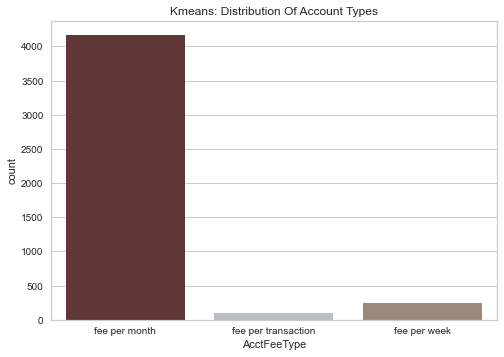

In [46]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60", 'red',"black","blue"]
pl = sns.countplot(x=account_df["AcctFeeType"], palette= pal)
pl.set_title("Kmeans: Distribution Of Account Types")
plt.show()

In [25]:
#Dropping the outliers by setting a cap on Age and income. 
account_df = account_df[(account_df["TransAmountKurto"]< 15)]
account_df = account_df[(account_df["BalanceMin"]> -30000)]
print("The total number of data-points after removing the outliers are:", len(account_df))

The total number of data-points after removing the outliers are: 4494


Encoding

In [47]:
mapping = {'fee per month': 2, 'fee per transaction':0, 'fee per week':1}
account_df['AcctFeeType'] = account_df['AcctFeeType'].replace(mapping)
account_df

,district_id,AcctFeeType,AcctCreateDate,TransCount,TransAmountMean,TransAmountStd,TransAmountSkew,TransAmountKurto,KurtoNor,SkewNor,SpendingKurtoNor,SpendingSkewNor,IncomeKurtoNor,IncomeSkewNor,BalanceRate,BalanceMean,BalanceStd,BalanceMin,BalanceMax
account_id,,,,,,,,,,,,,,,,,,,
576,55,2,930101,286,3034.399301,2522.318882,0.405812,-1.369035,-1.493689,2.787054,-0.012488,5.586610,0.179681,29.994131,121.064912,28495.208741,8179.224876,900.0,44853.6
3818,74,2,930101,488,5615.053689,6555.187106,1.769252,NaN,11.953793,15.906912,0.020981,6.170467,-0.057755,4.675334,125.986037,47177.765574,11844.159489,600.0,82000.8
704,55,2,930101,407,6544.757248,7812.679384,1.144122,-1.581009,0.646652,9.388337,-0.088899,1.952292,-0.026367,6.258528,197.972167,34726.788698,11281.096195,1000.0,82976.7
2378,16,2,930101,363,14605.581267,14545.034188,1.177635,-1.420735,2.270807,9.121959,0.041990,8.979062,0.004184,5.783141,129.898895,55223.939945,27192.180897,700.0,151483.0
2632,24,2,930102,492,4441.815447,5435.662202,1.404617,-0.632797,4.142297,12.680537,-0.077144,1.686195,-0.029990,6.053629,125.481466,34664.846545,9756.950648,1100.0,65853.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,55,2,971228,58,1528.417241,1741.787773,2.792632,-0.727856,16.824583,8.456463,-0.222993,1.429369,0.062201,4.888760,222.970175,17892.250000,4838.279165,800.0,26468.4
3958,59,2,971228,35,15873.805714,11733.491166,-0.305398,-0.660262,-1.686313,-0.705610,-0.275209,-1.217711,0.012370,-2.641710,1507.761765,44227.271429,16687.774286,1000.0,77511.8
777,30,2,971228,67,18684.871642,15434.352020,0.721531,-0.002615,-0.325875,2.356791,-0.664518,0.227347,-0.686491,0.059999,1059.710606,74854.343284,27877.945137,300.0,136506.4


C:\Users\hazir\AppData\Local\Temp\ipykernel_16928\1429217717.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corrmat, dtype=np.bool)


Text(0.5, 1.0, 'Correlation Matrix')

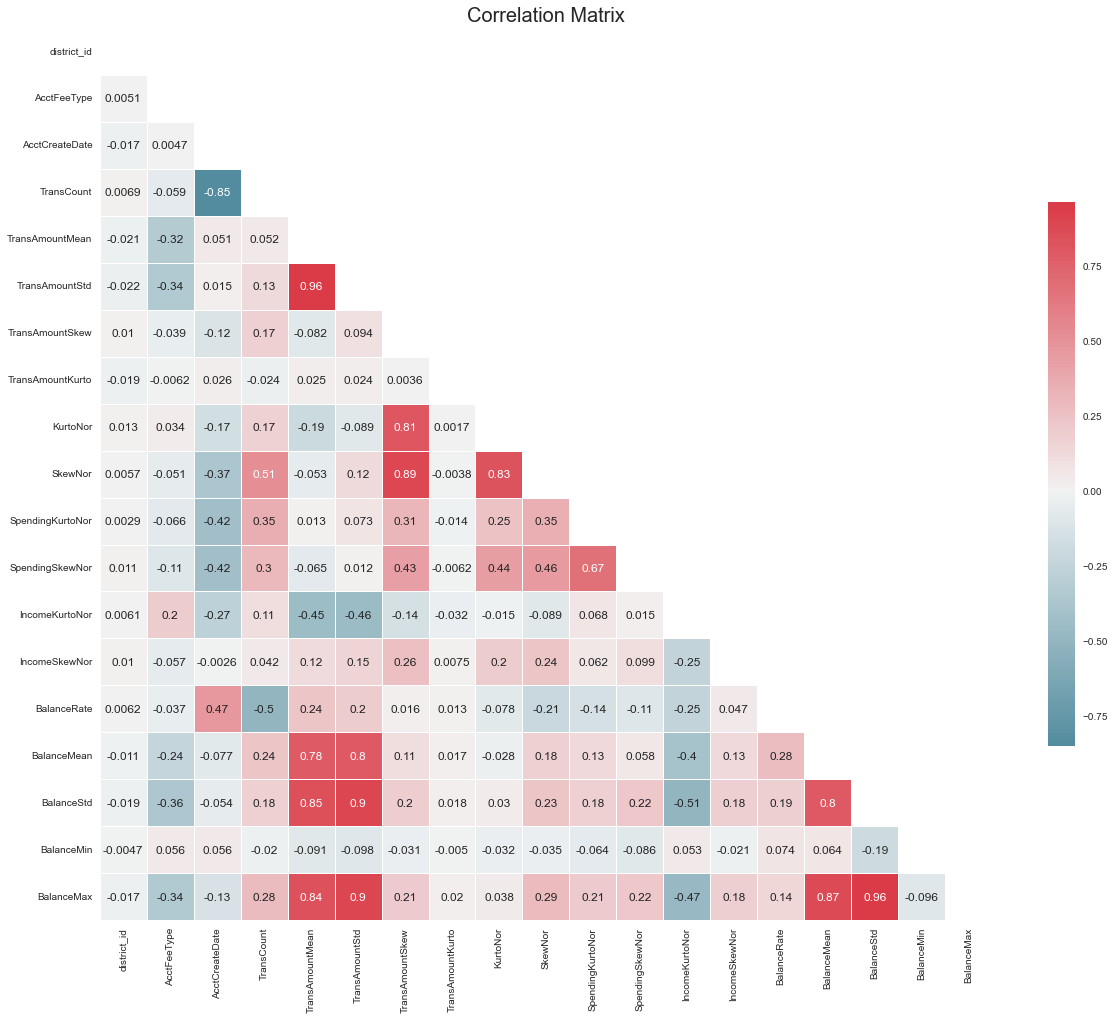

In [48]:
corrmat = account_df.corr()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 20))

# Generate a mask for the upper triangle
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Plot the heatmap with the mask and correct aspect ratio
sns.heatmap(corrmat, mask=mask, cmap=cmap, center=0, annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

# Add a title to the plot
plt.title('Correlation Matrix', fontsize= 20)

In [49]:
drop_cols = [
    'district_id',
    'TransAmountSkew',
    'TransAmountKurto',
    
]
account_df = account_df.drop(drop_cols, axis=1)
account_df.columns

Index(['AcctFeeType', 'AcctCreateDate', 'TransCount', 'TransAmountMean',
       'TransAmountStd', 'KurtoNor', 'SkewNor', 'SpendingKurtoNor',
       'SpendingSkewNor', 'IncomeKurtoNor', 'IncomeSkewNor', 'BalanceRate',
       'BalanceMean', 'BalanceStd', 'BalanceMin', 'BalanceMax'],
      dtype='object')

In [76]:
drop_cols = [
    'KMeansLabels',
    'AggLabels'
    
]
account_df = account_df.drop(drop_cols, axis=1)
account_df.columns

Index(['AcctFeeType', 'AcctCreateDate', 'TransCount', 'TransAmountMean',
       'TransAmountStd', 'KurtoNor', 'SkewNor', 'SpendingKurtoNor',
       'SpendingSkewNor', 'IncomeKurtoNor', 'IncomeSkewNor', 'BalanceRate',
       'BalanceMean', 'BalanceStd', 'BalanceMin', 'BalanceMax'],
      dtype='object')

In [83]:
account_df.columns

Index(['AcctFeeType', 'AcctCreateDate', 'TransCount', 'TransAmountMean',
       'TransAmountStd', 'KurtoNor', 'SkewNor', 'SpendingKurtoNor',
       'SpendingSkewNor', 'IncomeKurtoNor', 'IncomeSkewNor', 'BalanceRate',
       'BalanceMean', 'BalanceStd', 'BalanceMin', 'BalanceMax'],
      dtype='object')

In [85]:
'''columns = 
scaler = MinMaxScaler()
scaler.fit(account_df)
scaled_df = pd.DataFrame(scaler.transform(account_df),columns= account_df.columns )

from sklearn.preprocessing import MinMaxScaler
'''

# select the columns to scale
cols_to_scale = ['TransCount','TransAmountMean', 'TransAmountStd', 'BalanceRate', 'BalanceMean', 'BalanceStd', 'BalanceMin', 'BalanceMax']

# create a scaler object and fit on the selected columns
scaler = MinMaxScaler()
scaler.fit(account_df[cols_to_scale])

# transform the selected columns
scaled_cols = scaler.transform(account_df[cols_to_scale])

# create a new dataframe with the scaled columns
scaled_df = pd.DataFrame(scaled_cols, columns=cols_to_scale)

# add the scaled columns back to the original dataframe
account_df[cols_to_scale] = scaled_df


In [110]:
account_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4500 entries, 576 to 3276
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AcctFeeType       4500 non-null   int64  
 1   AcctCreateDate    4500 non-null   int64  
 2   TransCount        3948 non-null   float64
 3   TransAmountMean   3948 non-null   float64
 4   TransAmountStd    3948 non-null   float64
 5   KurtoNor          4500 non-null   float64
 6   SkewNor           4500 non-null   float64
 7   SpendingKurtoNor  4500 non-null   float64
 8   SpendingSkewNor   4500 non-null   float64
 9   IncomeKurtoNor    4500 non-null   float64
 10  IncomeSkewNor     4500 non-null   float64
 11  BalanceRate       3948 non-null   float64
 12  BalanceMean       3948 non-null   float64
 13  BalanceStd        3948 non-null   float64
 14  BalanceMin        3948 non-null   float64
 15  BalanceMax        3948 non-null   float64
 16  KMeansLabels      4500 non-null   int32 

In [111]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransCount       4500 non-null   float64
 1   TransAmountMean  4500 non-null   float64
 2   TransAmountStd   4500 non-null   float64
 3   BalanceRate      4500 non-null   float64
 4   BalanceMean      4500 non-null   float64
 5   BalanceStd       4500 non-null   float64
 6   BalanceMin       4500 non-null   float64
 7   BalanceMax       4500 non-null   float64
dtypes: float64(8)
memory usage: 281.4 KB


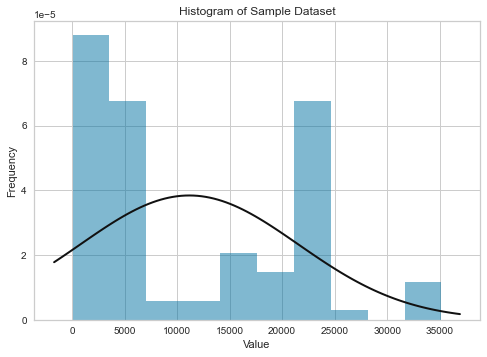

In [56]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

#max skew
x = trans_df[trans_df['account_id']==424]['amount']

plt.hist(x, bins=10, density=True, alpha=0.5)

mu, std = np.mean(x), np.std(x)

# Add a normal distribution line to the plot
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)


# Add labels and a title to the plot
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Dataset')
plt.show()

C:\Users\hazir\AppData\Local\Temp\ipykernel_16928\3760985763.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corrmat, dtype=np.bool)


Text(0.5, 1.0, 'Correlation Matrix')

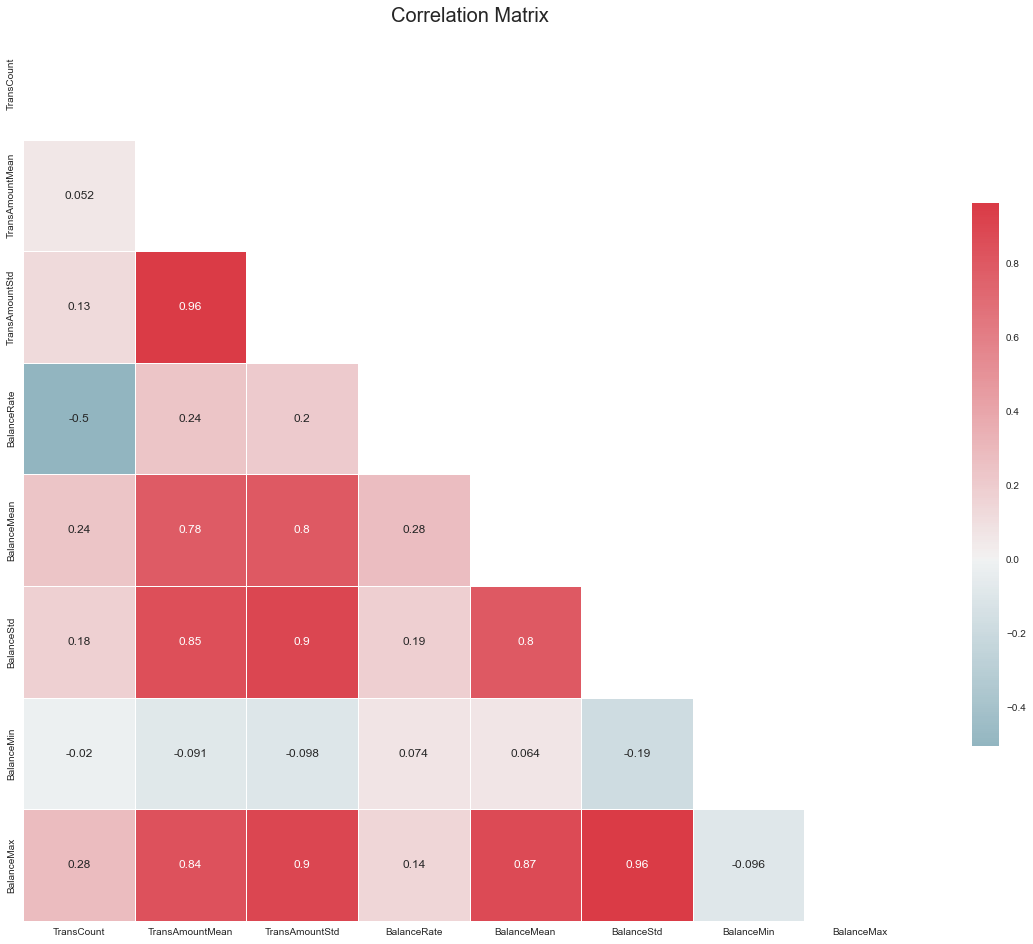

In [90]:
corrmat = scaled_df.corr()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 20))

# Generate a mask for the upper triangle
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Plot the heatmap with the mask and correct aspect ratio
sns.heatmap(corrmat, mask=mask, cmap=cmap, center=0, annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

# Add a title to the plot
plt.title('Correlation Matrix', fontsize= 20)

In [91]:

mean = scaled_df.mean()
std_dev = scaled_df.std()

# Print the results
print("Mean of the scaled data:", mean)
print("Standard deviation of the scaled data:", std_dev)


Mean of the scaled data: TransCount         0.316318
TransAmountMean    0.237523
TransAmountStd     0.275270
BalanceRate        0.164789
BalanceMean        0.420251
BalanceStd         0.302457
BalanceMin         0.633401
BalanceMax         0.293862
dtype: float64
Standard deviation of the scaled data: TransCount         0.185730
TransAmountMean    0.192178
TransAmountStd     0.223731
BalanceRate        0.084569
BalanceMean        0.197408
BalanceStd         0.219063
BalanceMin         0.035967
BalanceMax         0.204853
dtype: float64


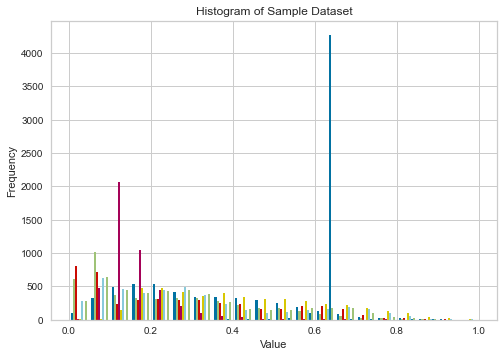

In [92]:
import matplotlib.pyplot as plt
import numpy as np


num_cols = scaled_df.select_dtypes(include=['float64', 'int64']).columns

# Plot a histogram of the data with 20 bins
plt.hist(scaled_df[num_cols], bins=20)

# Add labels and a title to the plot
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Dataset')
plt.show()


In [93]:
scaled_df.head()

,TransCount,TransAmountMean,TransAmountStd,BalanceRate,BalanceMean,BalanceStd,BalanceMin,BalanceMax
0,0.473504,0.081535,0.069480,0.111477,0.311647,0.166218,0.640548,0.147346
1,0.818803,0.183220,0.253737,0.112888,0.550755,0.265501,0.635975,0.339560
2,0.680342,0.219853,0.311190,0.133527,0.391402,0.250248,0.642072,0.344610
3,0.605128,0.537471,0.618783,0.114009,0.653733,0.681281,0.637499,0.699088
4,0.825641,0.136991,0.202587,0.112743,0.390609,0.208958,0.643596,0.256007


Text(0.5, 1.0, 'Scree Plot')

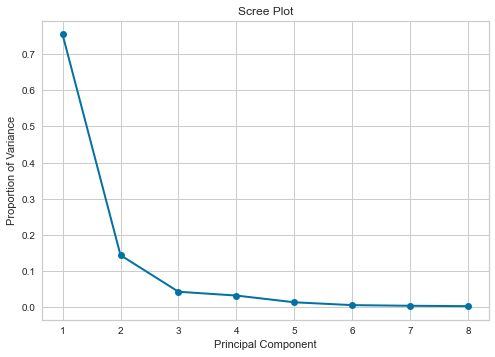

In [109]:
pca = PCA().fit(scaled_df)
variance_ratios = pca.explained_variance_ratio_
plt.plot(range(1, len(variance_ratios)+1), variance_ratios, 'bo-', linewidth=2)
plt.xticks(np.arange(1, len(variance_ratios)+1, 1.0))
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance')
plt.title('Scree Plot')

In [100]:
pca = PCA(n_components=2)
pca.fit(scaled_df)
transformed_df = pd.DataFrame(pca.transform(scaled_df))

c:\Users\hazir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hazir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hazir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hazir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hazir\anaconda3\lib\site-packages\sklearn\clust

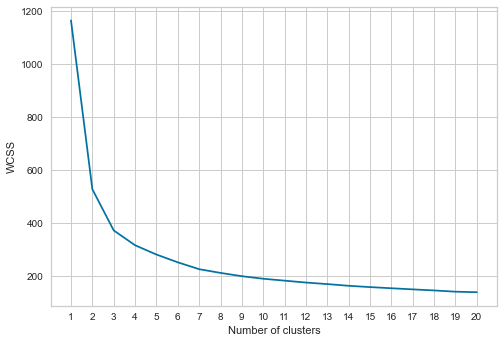

In [101]:
wcss = []
centroids = []

# Loop over different values of k (number of clusters)
for k in range(1, 21):

    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_df)

    centroids.append(kmeans.cluster_centers_)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 21), wcss)
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1, len(wcss)+1, 1.0))
plt.ylabel('WCSS')
plt.show()

Elbow Method to determine the number of clusters to be formed:


c:\Users\hazir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hazir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hazir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hazir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hazir\anaconda3\lib\site-packages\sklearn\clust

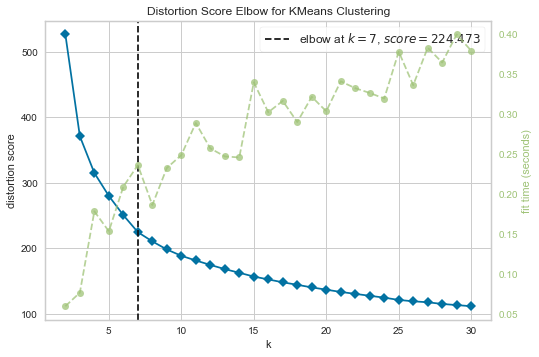

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [102]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=30)
Elbow_M.fit(scaled_df)
Elbow_M.show()

In [103]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering

from sklearn.metrics import silhouette_score, adjusted_rand_score, homogeneity_score

n_clusters = 7

#Initializing the models
kmeans = KMeans(n_clusters=n_clusters, init = 'k-means++', random_state=42)
agglo = AgglomerativeClustering(n_clusters=n_clusters)

y_kmeans = kmeans.fit_predict(transformed_df)
account_df["KMeansLabels"] = y_kmeans
y_agglo = agglo.fit_predict(transformed_df)
account_df["AggLabels"] = y_agglo


# Evaluate the clustering algorithms using silhouette score, adjusted rand index, and homogeneity score
kmeans_silhouette = silhouette_score(transformed_df, kmeans.labels_)
hierarchical_silhouette = silhouette_score(transformed_df, agglo.labels_)

print("K-Means: Silhouette score = {:.3f}".format(kmeans_silhouette))
print("Agglomerative: Silhouette score = {:.3f}".format(hierarchical_silhouette))

c:\Users\hazir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means: Silhouette score = 0.393
Agglomerative: Silhouette score = 0.305


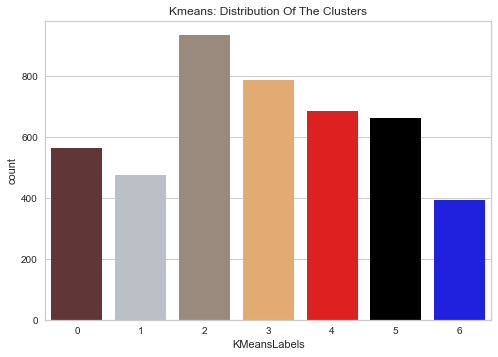

In [104]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60", 'red',"black","blue"]
pl = sns.countplot(x=account_df["KMeansLabels"], palette= pal)
pl.set_title("Kmeans: Distribution Of The Clusters")
plt.show()

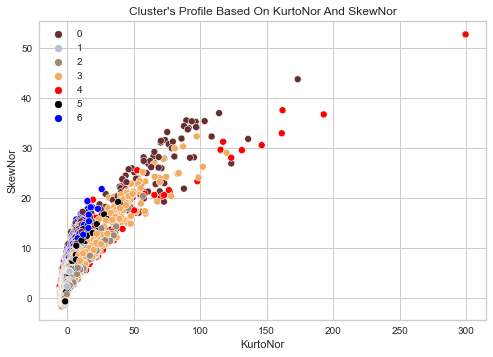

In [105]:
pl = sns.scatterplot(data = account_df,x=account_df['KurtoNor'], y=account_df['SkewNor'],hue=account_df["KMeansLabels"], palette= pal)
pl.set_title("Cluster's Profile Based On KurtoNor And SkewNor")
plt.legend()
plt.show()

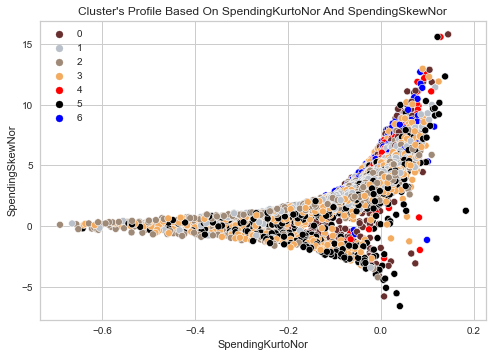

In [106]:
pl = sns.scatterplot(data = account_df,x=account_df['SpendingKurtoNor'], y=account_df['SpendingSkewNor'],hue=account_df["KMeansLabels"], palette= pal)
pl.set_title("Cluster's Profile Based On SpendingKurtoNor And SpendingSkewNor")
plt.legend()
plt.show()

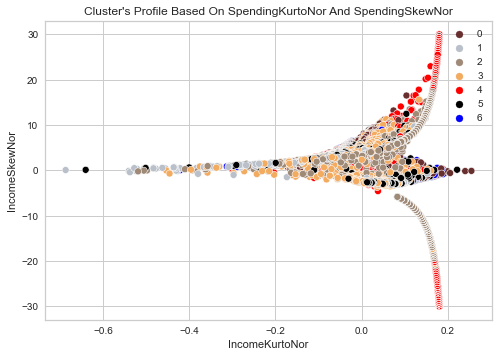

In [107]:
pl = sns.scatterplot(data = account_df,x=account_df['IncomeKurtoNor'], y=account_df['IncomeSkewNor'],hue=account_df["KMeansLabels"], palette= pal)
pl.set_title("Cluster's Profile Based On SpendingKurtoNor And SpendingSkewNor")
plt.legend()
plt.show()

In [ ]:
client_df = pd.read_csv('czech-financial-dataset/data/client.csv')
print("number of rows", len(client_df))
client_df.head(20)

In [ ]:
disp_df = pd.read_csv('czech-financial-dataset/data/disp.csv')
print("number of rows", len(disp_df))
disp_df.head(20)

In [ ]:
disp_df['type'].unique()

In [ ]:
loan_df = pd.read_csv('czech-financial-dataset/data/loan.csv')
print("number of rows", len(loan_df))
loan_df.head(20)

In [ ]:
order_df = pd.read_csv('czech-financial-dataset/data/order.csv')
print("number of rows", len(order_df))
order_df.head(20)